In [22]:
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
import statistics
import pandas as pd
%matplotlib inline

In [23]:
## basic read in

In [24]:
def max_acc_point(acc_list):
    acc_point = np.argmax(acc_list)
    return acc_point

In [25]:
def min_loss_point(loss_list):
    loss_point = np.argmin(loss_list)
    return loss_point

In [26]:
def index_less_than(mylist,myvalue,value2):
    for i in range(len(mylist)):
        if mylist[i]<myvalue:
            if mylist[i]>0.78:
                return len(mylist)-1
            else:
                return i
    return len(mylist)-1

In [27]:
def es_point(acc_list,p): # p means steps after the max index
    max_num = 0
    count = 0
    for i in range(len(acc_list)):
        if acc_list[i]>max_num:
            max_num = acc_list[i]
            count = 0
        count = count+1
        if count>p:
            return i-1
    return int(len(acc_list)-1)

In [28]:
def windowed(s,half_window): # s is a list
    s_mean=[]
    s_var=[]
    window_size = half_window*2 + 1
    for i in range(len(s)-window_size+1):
        k = i + half_window 
        s_sub=s[k-half_window:k+half_window+1]
        sub_mean=sum(s_sub)/len(s_sub)
        s_mean.append(sub_mean)
        sub_var=statistics.variance(s_sub)
        s_var.append(sub_var)
    return s_mean,s_var

In [29]:
def read_acc_mean(files,i,speed=1):
    fileset = pd.concat( [pd.read_csv(f,header=None,sep=' ',names=['loss','acc'])['acc'] for f in files], axis=1)
    normalset = pd.concat( [fileset.iloc[:,i] for i in range(len(fileset.columns)) if fileset.iloc[:,i].isnull().any()==False], axis=1)
    normalset_mean = normalset.mean(axis=1).dropna()
    if speed==1:
        return normalset_mean   
    delayset = pd.concat( [fileset.iloc[:,i] for i in range(len(fileset.columns)) if fileset.iloc[:,i].isnull().any()==True], axis=1)
    delayset_mean = delayset.mean(axis=1).dropna()
    return normalset_mean,delayset_mean
def read_loss_mean(files,i,speed=1):
    fileset = pd.concat( [pd.read_csv(f,header=None,sep=' ',names=['loss','acc'])['loss'] for f in files], axis=1)
    normalset = pd.concat( [fileset.iloc[:,i] for i in range(len(fileset.columns)) if fileset.iloc[:,i].isnull().any()==False], axis=1)
    normalset_mean = normalset.mean(axis=1).dropna()
    if speed==1:
        return normalset_mean   
    delayset = pd.concat( [fileset.iloc[:,i] for i in range(len(fileset.columns)) if fileset.iloc[:,i].isnull().any()==True], axis=1)
    delayset_mean = delayset.mean(axis=1).dropna()
    return normalset_mean,delayset_mean

In [30]:
## how to plot

In [31]:
def plot_line(i,k,basedir,result,lab,addon=''):
    s1=np.load(os.path.join(basedir,result[k]))
    p=1000
    s1_epo = [i+1 for i in s1[0][:p]]
    ax[i].plot(s1_epo,s1[2][:p], label=lab[k]+addon)

In [32]:
def plot_window_acc(i,k,half_window,basedir,result,lab,line_color,dot_color,addon=''):
    s1=np.load(os.path.join(basedir,result[k]))
    p=1000
    
    (s_mean,s_varience)=windowed(s1[2][:p],half_window)

    s_epo=[i+half_window+1 for i in range(len(s_mean))]
    ax[i].plot(s_epo,s_mean, label=lab[k]+addon,color = line_color) # can also plot s_varience if want
    
    (s_loss,_)=windowed(s1[1][:p],half_window)
    
    index_min_loss = min_loss_point(s_loss)
    ax[i].plot(index_min_loss+half_window+1,s_mean[index_min_loss],dot_color)

    
    
#     # for bad node only
#     index_min_loss = min_loss_point(s_loss)
#     index_min_acc = min_loss_point(s_mean[index_min_loss:])+index_min_loss
#     min_acc = s_mean[index_min_acc]
#     index_less_than_nb = index_less_than(s_mean[index_min_loss:],min_acc+0.05,1)+index_min_loss
#     acc_drop = s_mean[index_less_than_nb]
#     ax[i].scatter(index_less_than_nb,acc_drop,c='k')    
    
    
#     index_max=np.argmax(s_mean)
#     ax[i].plot(index_max+half_window+1,s_mean[index_max],dot_color)


In [33]:
def plot_file_acc(i,k,basedir,node_dir,lab,speed=1,filename='self_EVAL.txt'):
    files = glob.glob(basedir +'/'+ node_dir[k]+ '/worker_nodes/*/'+filename)
    linelab = lab[k]
    if speed==1:
        normalset_mean = read_acc_mean(files,i,speed)
        set_plt = [i+1 for i in range(len(normalset_mean))]
        ax[i].plot(set_plt,normalset_mean, label=linelab+'_t')
#         print('only usual')
        
    else:
        normalset_mean,delayset_mean = read_acc_mean(files,i,speed)
        
        normal_plt = [i+1 for i in range(len(normalset_mean))]
        ax[i].plot(normal_plt,normalset_mean, label=linelab+'_usual')
        
        new_delay_set = [val for val in delayset_mean for _ in range(speed)]
        delay_plt = [i+1 for i in range(len(new_delay_set))]
        ax[i].plot(delay_plt,new_delay_set, label=linelab+'_delay')

In [34]:
def plot_file_window_acc(i,k,half_window,basedir,node_dir,lab,speed=1,filename='self_EVAL.txt'):
    files = glob.glob(basedir +'/'+ node_dir[k]+ '/worker_nodes/*/'+filename)
    linelab = lab[k]
    if speed==1:
        normalset_mean = read_acc_mean(files,i,speed)
        (s_mean,s_varience)=windowed(normalset_mean,half_window)
        s_epo=[i+half_window+1 for i in range(len(s_mean))]
        ax[i].plot(s_epo,s_mean, label=linelab+'_t')
    else:
        normalset_mean,delayset_mean = read_acc_mean(files,i,speed)

        (s_mean,s_varience)=windowed(normalset_mean,half_window)
        s_epo=[i+half_window+1 for i in range(len(s_mean))]
        ax[i].plot(s_epo,s_mean, label=linelab+'_usual')
        
        new_delay_set = [val for val in delayset_mean for _ in range(speed)]
        (s_mean,s_varience)=windowed(new_delay_set,half_window)
        s_epo=[i+half_window+1 for i in range(len(s_mean))]
        ax[i].plot(s_epo,s_mean, label=linelab+'_delay')


## Data Dispersion

In [35]:
basedir=os.path.join('DataDispersion')
# os.listdir(basedir)

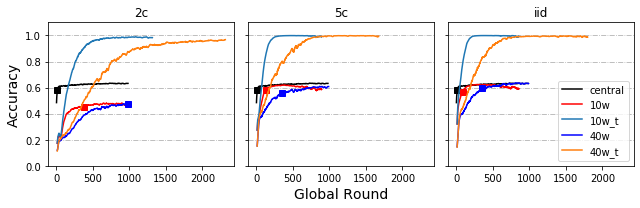

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(9, 3))
# fig.suptitle('4k',y=1.05,fontsize=16)
# fig.suptitle('Data Dispersion - testing accuracy',y=1.05,fontsize=16)
# fig.suptitle('Data Dispersion - training accuracy',y=1.05,fontsize=16)

title_list = ['2c','5c','iid']

# in order: dly8-30/12/3, dly20, dly32
result=[
    '2c.10w.4000.loc1.earlystop500.20200501-072809.npy',
    '2c.40w.4000.loc1.earlystop500.20200507-172304.npy',
    '5c.10w.4000.loc1.earlystop500.20200501-024326.npy',
    '5c.40w.4000.loc1.earlystop500.20200506-215910.npy',
    'iid.10w.4000.loc1.earlystop500.20200501-020117.npy',
    'iid.40w.4000.loc1.earlystop500.20200507-014322.npy',
]

lab=[
    '10w','40w',
    '10w','40w',
    '10w','40w',
]

node_dir = [
    'loc2c1s','dd2',
    'loc5c1s','dd5',
    'lociid1s','ddiid',
]


line_color_list = [ 'r','b', 'g',  'm', 'c','y']
dot_color_list = [ 'rs',  'bs','gs', 'ms', 'cs','ys']



half_window=10
for i in range(3):
    s1=np.load('4000_central.batch50.npy')
    (s_mean,s_varience)=windowed(s1[2][:1000],half_window)
    (s_loss,_)=windowed(s1[1][:1000],half_window)
    s_epo=[i+1 for i in range(len(s_mean))]
    ax[i].plot(s_epo,s_mean, label='central',color = 'k') 
    index_min_loss = min_loss_point(s_loss)
    ax[i].plot(index_min_loss,s_mean[index_min_loss],'ks')
    
    for j in [0,1]:
        
        k = i*2+j
        speed = 1     

        line_color = line_color_list[j]
        dot_color = dot_color_list[j]
        
#         plot_line(i,k,basedir,result,lab,addon='')
#         plot_file_acc(i,k,basedir,node_dir,lab,speed,filename='self_EVAL.txt')
        plot_window_acc(i,k,half_window,basedir,result,lab,line_color,dot_color,addon='')
        plot_file_window_acc(i,k,half_window,basedir,node_dir,lab,speed,filename='self_EVAL.txt')
        

    ax[1].set_xlabel('Global Round',fontsize=14)
    ax[i].set_ylim([0, 1.1])
    ax[i].grid(axis="y",ls='-.')
    ax[i].set_title(title_list[i])

    
# ax[0].set_ylim([0.4, 0.65])
# ax[1].set_ylim([0.4, 0.65])
# ax[2].set_ylim([0.4, 0.65])    
    
    
ax[0].set_ylabel('Accuracy',fontsize=14)
ax[2].legend() 
plt.tight_layout()
plt.show()

## Bad Node

In [17]:
basedir=os.path.join('BadNode')
# os.listdir(basedir)

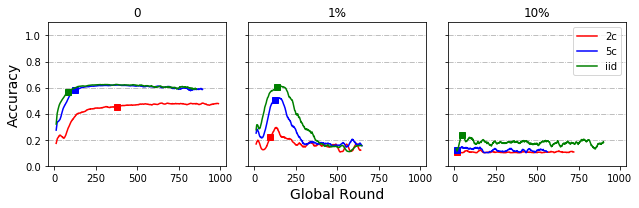

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(9, 3))
# fig.suptitle('4k',y=1.05,fontsize=16)
# fig.suptitle('Abmormal node - testing accuracy',y=1.05,fontsize=16)
# fig.suptitle('Abmormal node - training accuracy',y=1.05,fontsize=16)

title_list = ['0','1%','10%']

# in order: dly8-30/12/3, dly20, dly32
result=[
    '2c.10w.4000.loc1.earlystop500.20200501-072809.npy',
    '2c.10w.4000.plus1bad_each40.loc1.earlystop500.20200501-015142.npy',
    '2c.10w.4000.plus1bad_each400.loc1.earlystop500.20200501-031558.npy',

    '5c.10w.4000.loc1.earlystop500.20200501-024326.npy',
    '5c.10w.4000.plus1bad_each40.loc1.earlystop500.20200501-023155.npy',
    '5c.10w.4000.plus1bad_each400.loc1.earlystop500.20200501-004052.npy',

    'iid.10w.4000.loc1.earlystop500.20200501-020117.npy',
    '11d.10w.4000.plus1bad_each40.loc1.earlystop500.20200501-020918.npy',
    '11d.10w.4000.plus1bad_each400.loc1.earlystop500.20200501-060927.npy',
]

lab=[
    '2c','2c','2c',
    '5c','5c','5c', 
    'iid','iid','iid',   

]



node_dir = [
    'loc2c1s','bad2c400','bad2c4000',
    'loc5c1s','bad5c400','bad5c4000',
    'lociid1s','badiid400','badiid4000',
]


line_color_list = [ 'r','b', 'g',  'm', 'c','y']
dot_color_list = [ 'rs',  'bs','gs', 'ms', 'cs','ys']

half_window=10
for i in range(3):
#     s1=np.load('40000_central.batch100.es500.npy')
#     (s_mean,s_varience)=windowed(s1[2][:1000],half_window)
#     (s_loss,_)=windowed(s1[1][:1000],half_window)
#     s_epo=[i+1 for i in range(len(s_mean))]
#     ax[i].plot(s_epo,s_mean, label='central',color = 'k') 
#     index_min_loss = min_loss_point(s_loss)
#     ax[i].plot(index_min_loss,s_mean[index_min_loss],'ks')
    
    for j in [0,1,2]:
        k = j*3+i
        half_window_size=10
        speed = 1     
        
        line_color = line_color_list[j]
        dot_color = dot_color_list[j]
        
#         plot_line(i,k,basedir,result,lab,addon='')
#         plot_file_acc(i,k,basedir,node_dir,lab,speed,filename='self_EVAL.txt')
        plot_window_acc(i,k,half_window,basedir,result,lab,line_color,dot_color,addon='')
#         plot_file_window_acc(i,k,half_window,basedir,node_dir,lab,speed,filename='self_EVAL.txt')
        

    ax[1].set_xlabel('Global Round',fontsize=14)
    ax[i].set_ylim([0, 1.1])
    ax[i].grid(axis="y",ls='-.')
    ax[i].set_title(title_list[i])
ax[0].set_ylabel('Accuracy',fontsize=14)
ax[2].legend() 
plt.tight_layout()
plt.show()

ValueError: No objects to concatenate

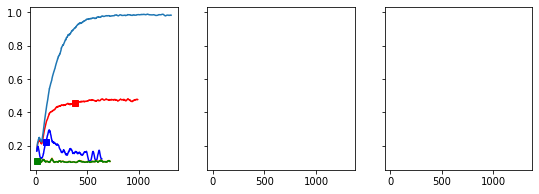

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(9, 3))
# fig.suptitle('4k',y=1.05,fontsize=16)
# fig.suptitle('Abmormal node - testing accuracy',y=1.05,fontsize=16)
# fig.suptitle('Abmormal node - training accuracy',y=1.05,fontsize=16)

title_list = ['2c','5c','iid']

# in order: dly8-30/12/3, dly20, dly32
result=[
    '2c.10w.4000.loc1.earlystop500.20200501-072809.npy',
    '2c.10w.4000.plus1bad_each40.loc1.earlystop500.20200501-015142.npy',
    '2c.10w.4000.plus1bad_each400.loc1.earlystop500.20200501-031558.npy',

    '5c.10w.4000.loc1.earlystop500.20200501-024326.npy',
    '5c.10w.4000.plus1bad_each40.loc1.earlystop500.20200501-023155.npy',
    '5c.10w.4000.plus1bad_each400.loc1.earlystop500.20200501-004052.npy',

    'iid.10w.4000.loc1.earlystop500.20200501-020117.npy',
    '11d.10w.4000.plus1bad_each40.loc1.earlystop500.20200501-020918.npy',
    '11d.10w.4000.plus1bad_each400.loc1.earlystop500.20200501-060927.npy',
]

lab=[
    '0','1%','10%',  
    '0','1%','10%',  
    '0','1%','10%',  

]


node_dir = [
    'loc2c1s','bad2c400','bad2c4000',
    'loc5c1s','bad5c400','bad5c4000',
    'lociid1s','badiid400','badiid4000',
]


line_color_list = [ 'r','b', 'g',  'm', 'c','y']
dot_color_list = [ 'rs',  'bs','gs', 'ms', 'cs','ys']

half_window=10
for i in range(3):
#     s1=np.load('40000_central.batch100.es500.npy')
#     (s_mean,s_varience)=windowed(s1[2][:1000],half_window)
#     (s_loss,_)=windowed(s1[1][:1000],half_window)
#     s_epo=[i+1 for i in range(len(s_mean))]
#     ax[i].plot(s_epo,s_mean, label='central',color = 'k') 
#     index_min_loss = min_loss_point(s_loss)
#     ax[i].plot(index_min_loss,s_mean[index_min_loss],'ks')
    
    for j in [0,1,2]:
        k = i*3+j
        half_window_size=10
        speed = 1     
        
        line_color = line_color_list[j]
        dot_color = dot_color_list[j]
        
#         plot_line(i,k,basedir,result,lab,addon='')
#         plot_file_acc(i,k,basedir,node_dir,lab,speed,filename='self_EVAL.txt')
        plot_window_acc(i,k,half_window,basedir,result,lab,line_color,dot_color,addon='')
        plot_file_window_acc(i,k,half_window,basedir,node_dir,lab,speed,filename='self_EVAL.txt')
        

    ax[1].set_xlabel('Global Round',fontsize=14)
    ax[i].set_ylim([0, 1.1])
    ax[i].grid(axis="y",ls='-.')
    ax[i].set_title(title_list[i])
ax[0].set_ylabel('Accuracy',fontsize=14)
ax[2].legend() 
plt.tight_layout()
plt.show()

## Local Steps

In [18]:
basedir=os.path.join('LocalStep')
# os.listdir(basedir)

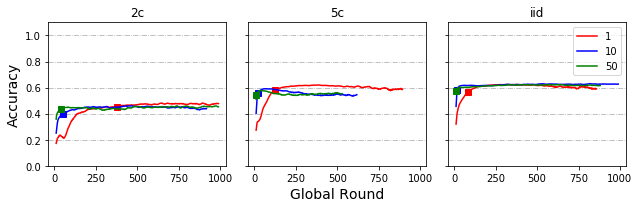

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(9, 3))
# fig.suptitle('4k',y=1.05,fontsize=16)
# fig.suptitle('Local Rounds - testing accuracy',y=1.05,fontsize=16)
# fig.suptitle('Local Rounds - training accuracy',y=1.05,fontsize=16)

title_list = ['2c','5c','iid']

# in order: dly8-30/12/3, dly20, dly32
result=[
     '2c.10w.4000.loc1.earlystop500.20200501-072809.npy',
     '2c.10w.4000.loc10.earlystop500.20200502-105042.npy',
     '2c.10w.4000.loc50.earlystop500.20200511-095914.npy',
    
     '5c.10w.4000.loc1.earlystop500.20200501-024326.npy',
     '5c.10w.4000.loc10.earlystop500.20200501-203358.npy',
     '5c.10w.4000.loc50.earlystop500.20200504-130145.npy',
    
     'iid.10w.4000.loc1.earlystop500.20200501-020117.npy',
     'iid.10w.4000.loc10.earlystop500.20200502-151734.npy',
     'iid.10w.4000.loc50.earlystop500.20200508-064129.npy',

]

lab=[
    '1','10','50',
    '1','10','50',
    '1','10','50',

]

node_dir = [ 
    'loc2c1s','loc2c10s', 'loc2c50s', 
    'loc5c1s', 'loc5c10s', 'loc5c50s',
    'lociid1s', 'lociid10s','lociid50s',
]


line_color_list = [ 'r','b', 'g',  'm', 'c','y']
dot_color_list = [ 'rs',  'bs','gs', 'ms', 'cs','ys']

half_window=10
for i in range(3):
    
    for j in [0,1,2]:
        k = i*3+j
        speed = 1     
        
        line_color = line_color_list[j]
        dot_color = dot_color_list[j]
        
#         plot_line(i,k,basedir,result,lab,addon='')
#         plot_file_acc(i,k,basedir,node_dir,lab,speed,filename='self_EVAL.txt')
        plot_window_acc(i,k,half_window,basedir,result,lab,line_color,dot_color,addon='')
#         plot_file_window_acc(i,k,half_window,basedir,node_dir,lab,speed,filename='self_EVAL.txt')
        

    ax[1].set_xlabel('Global Round',fontsize=14)
    ax[i].set_ylim([0, 1.1])
    ax[i].grid(axis="y",ls='-.')
    ax[i].set_title(title_list[i])

# ax[0].set_ylim([0.3, 0.55])
# ax[1].set_ylim([0.4, 0.65])
# ax[2].set_ylim([0.4, 0.65])
    
ax[0].set_ylabel('Accuracy',fontsize=14)
ax[2].legend() 
plt.tight_layout()
plt.show()

## Share Data

In [20]:
basedir=os.path.join('ShareData')
# os.listdir(basedir)

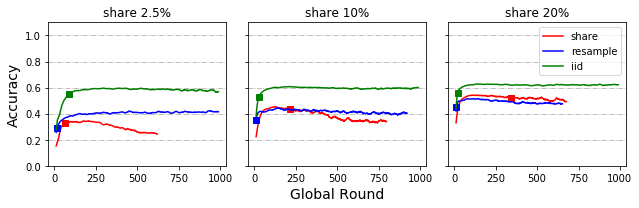

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(9, 3))
# fig.suptitle('4k',y=1.05,fontsize=16)

result = [
    '1c.10w.4000.share100.loc1.earlystop500.20200504-211245.npy',
    '1c.10w.4000.share100_epoiid.loc1.earlystop500.20200505-052608.npy',
    'iid.10w.4000.share100.loc1.earlystop500.20200505-111139.npy',
    
    '1c.10w.4000.share400.loc1.earlystop500.20200505-011914.npy',
    '1c.10w.4000.share400_epoiid.loc1.earlystop500.20200505-022211.npy',
    'iid.10w.4000.share400.loc1.earlystop500.20200505-113732.npy',
    
    '1c.10w.4000.share800.loc1.earlystop500.20200505-014623.npy',
    '1c.10w.4000.share800_epoiid.loc1.earlystop500.20200505-004219.npy',
    'iid.10w.4000.share800.loc1.earlystop500.20200505-125048.npy'
]
lab = [
    '1c.share100','1c.share100_epoiid','iid.share100',
    '1c.share400.loc1','1c.share400_epoiid','iid.share400',
    'share','resample','iid',
]
node_dir = [
    'sdn1','sde1','iidsd1',
    'sdn4','sde4','iidsd4',
    'sdn8','sde8','iidsd8'
]


title_list=['share 2.5%','share 10%','share 20%']

line_color_list = [ 'r','b', 'g',  'm', 'c','y']
dot_color_list = [ 'rs',  'bs','gs', 'ms', 'cs','ys']

half_window=10

for i in range(3):

#     plot_short_line(i,i,'zCentral',central_result,central_lab,1400)
#     plot_short_window_mean(i,i,half_window_size,'zCentral',central_result,central_lab,1400)
    
    for j in [0,1,2]:
        k= i*3+j
        speed = 1

        line_color = line_color_list[j]
        dot_color = dot_color_list[j]
        
#         plot_line(i,k,basedir,result,lab,addon='')
#         plot_file_acc(i,k,basedir,node_dir,lab,speed,filename='self_EVAL.txt')
        plot_window_acc(i,k,half_window,basedir,result,lab,line_color,dot_color,addon='')
#         plot_file_window_acc(i,k,half_window,basedir,node_dir,lab,speed,filename='self_EVAL.txt')
        

    ax[1].set_xlabel('Global Round',fontsize=14)
    ax[i].set_ylim([0, 1.1])
    ax[i].grid(axis="y",ls='-.')
    ax[i].set_title(title_list[i])
    
# ax[0].set_ylim([0.1, 0.1+0.35])
# ax[1].set_ylim([0.68, 0.78])
# ax[2].set_ylim([0.75, 0.85])
    
ax[0].set_ylabel('Accuracy',fontsize=14)
ax[2].legend() 
plt.tight_layout()
plt.show()

## Late update in some node

In [24]:
basedir=os.path.join('DelayUpdate')
# os.listdir(basedir)

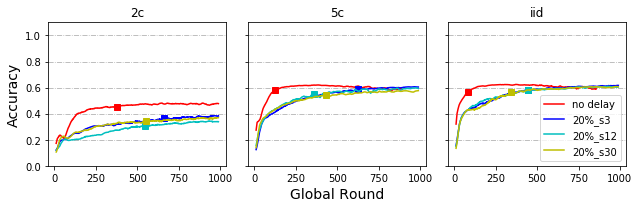

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(9, 3))
# fig.suptitle('4k',y=1.05,fontsize=16)
# fig.suptitle('Delayed Update - testing accuracy',y=1.05,fontsize=16)
# fig.suptitle('Delayed Update - training accuracy',y=1.05,fontsize=16)

title_list = ['2c','5c','iid']

# in order: dly8-30/12/3, dly20, dly32
result=[
    '2c.10w.4000.loc1.earlystop500.20200501-072809.npy',
    '2c.40w.4000.dly8.speed3.loc1.earlystop500.20200503-013135.npy',    
    '2c.40w.4000.dly20.speed3.loc1.earlystop500.20200502-160017.npy',
    '2c.40w.4000.dly32.speed3.loc1.earlystop500.20200430-223516.npy',
    '2c.40w.4000.dly8.speed12.loc1.earlystop500.20200502-161123.npy',
    '2c.40w.4000.dly8.speed30.loc1.earlystop500.20200503-084238.npy',
    
    
    '5c.10w.4000.loc1.earlystop500.20200501-024326.npy',
    '5c.40w.4000.dly8.speed3.loc1.earlystop500.20200502-160044.npy',
    '5c.40w.4000.dly20.speed3.loc1.earlystop500.20200504-180902.npy',
    '5c.40w.4000.dly32.speed3.loc1.earlystop500.20200503-210047.npy',  
    '5c.40w.4000.dly8.speed12.loc1.earlystop500.20200502-171548.npy',   
    '5c.40w.4000.dly8.speed30.loc1.earlystop500.20200502-182343.npy',


    'iid.10w.4000.loc1.earlystop500.20200501-020117.npy',
    'iid.40w.4000.dly8.speed3.loc1.earlystop500.20200502-193120.npy',
    'iid.40w.4000.dly20.speed3.loc1.earlystop500.20200503-002016.npy',
    'iid.40w.4000.dly32.speed3.loc1.earlystop500.20200502-184247.npy',
    'iid.40w.4000.dly8.speed12.loc1.earlystop500.20200502-133739.npy',
    'iid.40w.4000.dly8.speed30.loc1.earlystop500.20200503-184146.npy',
]

lab=[
    'no delay','20%_s3','50%_s3','80%_s3', '20%_s12','20%_s30', 
    'no delay','20%_s3','50%_s3','80%_s3', '20%_s12','20%_s30',     
    'no delay','20%_s3','50%_s3','80%_s3', '20%_s12','20%_s30', 
]


node_dir = [
    'dd2', 'du2c1','du2c2','du2c3','du2c4','du2c5',
    'dd5', 'du5c1','du5c2','du5c3','du5c4','du5c5',
    'ddiid', 'duiid1','duiid2','duiid3','duiid4','duiid5'
]

speed_list = [1,3,3,3,12,30,1,3,3,3,12,30,1,3,3,3,12,30]

line_color_list = [ 'r','b', 'g',  'm', 'c','y']
dot_color_list = [ 'rs',  'bs','gs', 'ms', 'cs','ys']

half_window=10

for i in range(3):
#     s1=np.load('40000_central.batch100.es500.npy')
#     (s_mean,s_varience)=windowed(s1[2][:1000],half_window)
#     (s_loss,_)=windowed(s1[1][:1000],half_window)
#     s_epo=[i+1 for i in range(len(s_mean))]
#     ax[i].plot(s_epo,s_mean, label='central',color = 'k') 
#     index_min_loss = min_loss_point(s_loss)
#     ax[i].plot(index_min_loss,s_mean[index_min_loss],'ks')
    
#     for j in [0,1,2,3]:
    for j in [0,1,4,5]:
        
        k = i*6+j
        
        speed = speed_list[k]
#         print(speed)
        
        
        line_color = line_color_list[j]
        dot_color = dot_color_list[j]
        
#         plot_line(i,k,basedir,result,lab,addon='')
#         plot_file_acc(i,k,basedir,node_dir,lab,speed,filename='self_EVAL.txt')
        plot_window_acc(i,k,half_window,basedir,result,lab,line_color,dot_color,addon='')
#         plot_file_window_acc(i,k,half_window,basedir,node_dir,lab,speed,filename='self_EVAL.txt')
        

    ax[1].set_xlabel('Global Round',fontsize=14)
    ax[i].set_ylim([0, 1.1])
    ax[i].grid(axis="y",ls='-.')
    ax[i].set_title(title_list[i])
    
# ax[0].set_ylim([0.1, 0.5])
# ax[1].set_ylim([0.5, 0.65])
# ax[2].set_ylim([0.5, 0.65])


    
ax[0].set_ylabel('Accuracy',fontsize=14)
ax[2].legend() 
plt.tight_layout()
plt.show()